- 3년 이상 당기 순이익 추이를 확인 
- 영업이익 : 매출액 - 매출원가 - 판관비 
- 당기 순이익 : (영업이익+영업외이익+특별이익) - (영업외 비용+특별손실+법인세)

In [ ]:
import requests
from bs4 import BeautifulSoup

def get_financial_analysis_table(stock_code):
    url = f"https://finance.naver.com/item/main.naver?code={stock_code}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # 기업실적분석 테이블을 포함한 부분을 선택
    table = soup.find('table', {'class': 'tb_type1 tb_num tb_type1_ifrs'})
    
    # 테이블 내용을 파싱하여 가져오기
    data = []
    if table:
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            cols = [col.text.strip() for col in cols]
            data.append(cols)
    
    return data

# 삼성전자의 기업실적분석 테이블 가져오기
stock_code = '005930'
financial_analysis_table = get_financial_analysis_table(stock_code)

# 항목값 출력
for row in financial_analysis_table:
    item_value = row[0]  # 각 행의 첫 번째 셀이 항목값
    print(item_value)


In [ ]:
import yfinance as yf
import pandas as pd

# 엔비디아(NVIDIA)의 심볼을 지정합니다.
symbol = 'NVDA'

# 최근 4년의 재무정보를 가져옵니다.
nvidia_annual = yf.Ticker(symbol).financials.loc['Revenue':'Net Income', '2022-01-30':'2025-01-30'].T

# 최근 5분기의 재무정보를 가져옵니다.
nvidia_quarterly = yf.Ticker(symbol).quarterly_financials.loc['Revenue':'Net Income'].T

# 결과를 출력합니다.
print("엔비디아(NVIDIA)의 최근 4년 재무정보:")
print(nvidia_annual)

print("\n엔비디아(NVIDIA)의 최근 5분기 재무정보:")
print(nvidia_quarterly)

# 데이터프레임으로 저장하기
nvidia_annual.to_csv('nvidia_annual_financials.csv')
nvidia_quarterly.to_csv('nvidia_quarterly_financials.csv')


In [15]:
symbol = '005930.KS'

df = yf.Ticker(symbol).financials.loc['Gross Profit':'Total Revenue'].T

In [28]:
import yfinance as yf
import pandas as pd

# 엔비디아(NVIDIA)의 심볼을 지정합니다.
symbol = '005930.KS'

# 최근 4년의 재무정보를 가져옵니다.
nvidia_annual = yf.Ticker(symbol).financials.loc['Gross Profit':'Total Revenue'].T

# 최근 5분기의 재무정보를 가져옵니다.
nvidia_quarterly = yf.Ticker(symbol).quarterly_financials.loc['Gross Profit':'Total Revenue'].T

# 결과를 출력합니다.
print("삼성전자의 최근 4년 재무정보:")
print(nvidia_annual)

print("\n삼성전자의 최근 5분기 재무정보:")
print(nvidia_quarterly)


삼성전자의 최근 4년 재무정보:
                 Gross Profit    Cost Of Revenue      Total Revenue
2023-12-31   78546914000000.0  180388580000000.0  258935494000000.0
2022-12-31  112189590000000.0  190041770000000.0  302231360000000.0
2021-12-31  113193457000000.0  166411342000000.0  279604799000000.0
2020-12-31   92318692000000.0  144488296000000.0  236806988000000.0

삼성전자의 최근 5분기 재무정보:
                Gross Profit   Cost Of Revenue     Total Revenue
2023-12-31  21664367000000.0  46115571000000.0  67779938000000.0
2023-09-30  20785926000000.0  46618726000000.0  67404652000000.0
2023-06-30  18358343000000.0  41647190000000.0  60005533000000.0
2023-03-31  17738278000000.0  46007093000000.0  63745371000000.0
2022-12-31  21836847000000.0  48627728000000.0  70464575000000.0


In [25]:

symbol = '005930.KS'

# 최근 4년의 재무정보를 가져옵니다.
nvidia_annual = yf.Ticker(symbol).financials.loc['Gross Profit':'Total Revenue'].T


In [40]:

import time
from py_lib.krx_lib import *
from pykrx import stock

def annual_financials_info(ticker):
    try:
        symbol = ticker+'.KS'
        df_annual_financials_info = yf.Ticker(symbol).financials.loc['Gross Profit':'Total Revenue'].T 
        df_annual_financials_info.insert(0,'ticker',ticker)
        df_annual_financials_info.to_csv("annual_financials_info.csv",mode='a', header=False)
    except KeyError:
        logging_text(ticker+"  annual_financials_info 수집 불가 ")


tickers = stock.get_market_ticker_list(market='KOSPI')
for i in tickers:
    annual_financials_info(i)
    time.sleep(1)


In [45]:
df_annual_financials_info = pd.read_csv('annual_financials_info.csv')
df_annual_financials_info.head(10)


,date,ticker,Gross Profit,Cost Of Revenue,Total Revenue
0,2022-12-31,095570,5.339470e+11,6.744206e+11,1.208368e+12
1,2021-12-31,095570,4.712844e+11,5.106633e+11,9.819477e+11
2,2020-12-31,095570,8.719561e+11,NaN,8.719561e+11
3,2022-12-31,006840,7.106811e+11,3.077279e+12,3.787960e+12
4,2021-12-31,006840,5.064308e+11,2.661269e+12,3.167700e+12
5,2020-12-31,006840,4.629352e+11,2.157042e+12,2.619977e+12
6,2023-12-31,027410,1.430865e+11,3.000871e+11,4.431736e+11
7,2022-12-31,027410,1.315792e+11,3.034182e+11,4.349974e+11
8,2021-12-31,027410,7.447534e+10,7.571242e+10,1.501878e+11
9,2020-12-31,027410,6.755105e+10,8.683024e+10,1.543813e+11


In [66]:
a = list(df_annual_financials_info.loc[df_annual_financials_info['Gross Profit'].isnull(),'ticker'])
b = list(df_annual_financials_info.loc[df_annual_financials_info['Cost Of Revenue'].isnull(),'ticker'])
c = list(df_annual_financials_info.loc[df_annual_financials_info['Total Revenue'].isnull(),'ticker'])

In [67]:
d = set(a+b+c)

In [68]:
d = list(d)

In [71]:
idx_a = df_annual_financials_info[df_annual_financials_info['ticker'].isin(d)].index
df_annual_financials_info_d = df_annual_financials_info.drop(idx_a)

In [74]:
df_annual_financials_info_d.to_csv('new_annual_financials_info.csv',index=False)

In [65]:
df_annual_financials_info

,date,ticker,Gross Profit,Cost Of Revenue,Total Revenue
0,2022-12-31,095570,5.339470e+11,6.744206e+11,1.208368e+12
1,2021-12-31,095570,4.712844e+11,5.106633e+11,9.819477e+11
2,2020-12-31,095570,8.719561e+11,NaN,8.719561e+11
3,2022-12-31,006840,7.106811e+11,3.077279e+12,3.787960e+12
4,2021-12-31,006840,5.064308e+11,2.661269e+12,3.167700e+12
...,...,...,...,...,...
3059,2021-12-31,005010,9.257441e+10,5.239311e+11,6.165055e+11
3060,2020-12-31,005010,4.371243e+10,3.219007e+11,3.656131e+11
3061,2022-12-31,003280,4.496010e+10,1.329000e+11,1.778601e+11
3062,2021-12-31,003280,5.673211e+09,7.605110e+10,8.172431e+10


In [75]:
df = pd.read_csv('new_annual_financials_info.csv')
df.head(10)

,date,ticker,Gross Profit,Cost Of Revenue,Total Revenue
0,2022-12-31,006840,7.106811e+11,3.077279e+12,3.787960e+12
1,2021-12-31,006840,5.064308e+11,2.661269e+12,3.167700e+12
2,2020-12-31,006840,4.629352e+11,2.157042e+12,2.619977e+12
3,2023-12-31,027410,1.430865e+11,3.000871e+11,4.431736e+11
4,2022-12-31,027410,1.315792e+11,3.034182e+11,4.349974e+11
5,2021-12-31,027410,7.447534e+10,7.571242e+10,1.501878e+11
6,2020-12-31,027410,6.755105e+10,8.683024e+10,1.543813e+11
7,2023-12-31,282330,1.522760e+12,6.671994e+12,8.194754e+12
8,2022-12-31,282330,1.386199e+12,6.229570e+12,7.615769e+12
9,2021-12-31,282330,1.177098e+12,5.604064e+12,6.781161e+12


In [ ]:
'ticker' 별로 date가 증가함에 따라  'Gross Profit','Total Revenue'이 증가하는 추세인 ticker 를 선별하는 python 코드를 작성해줘 

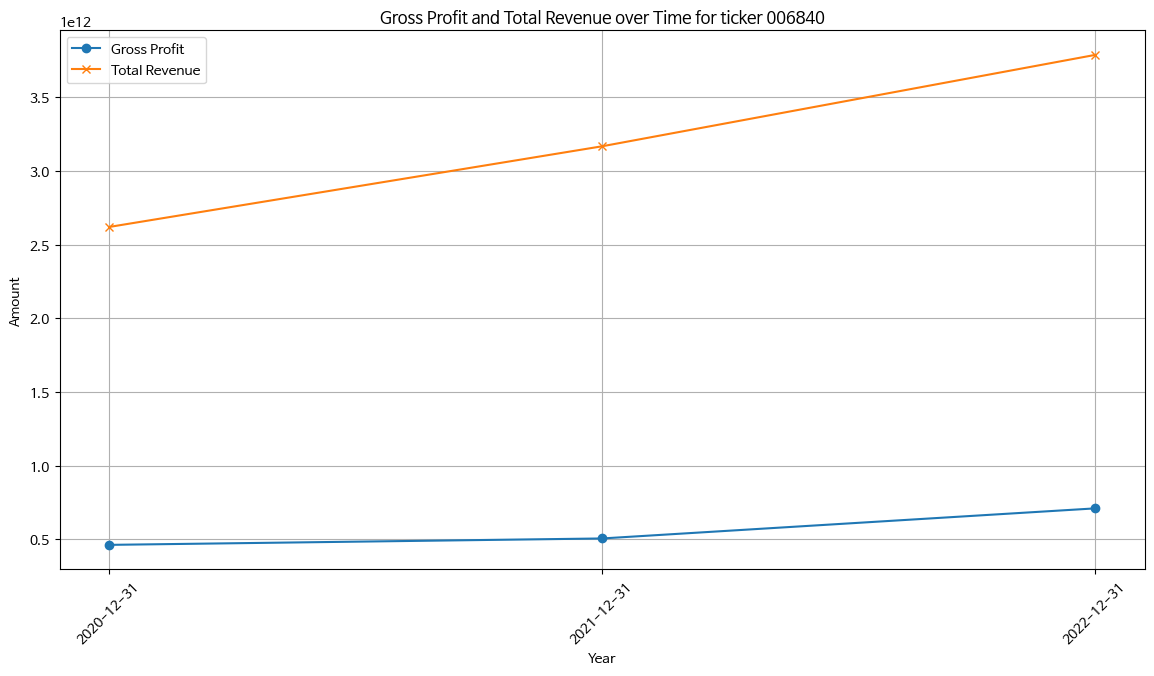

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# CSV 파일 경로
file_path = './new_annual_financials_info.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

# 관심 있는 ticker 선택 (예시: '006840')
interested_ticker = '006840'

# 해당 ticker 데이터 필터링
ticker_data = data[data['ticker'] == interested_ticker].sort_values('date')

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(ticker_data['date'], ticker_data['Gross Profit'], label='Gross Profit', marker='o')
plt.plot(ticker_data['date'], ticker_data['Total Revenue'], label='Total Revenue', marker='x')

plt.title(f'Gross Profit and Total Revenue over Time for ticker {interested_ticker}')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # x축 레이블 회전
plt.show()


In [78]:
import pandas as pd

# CSV 파일 경로
file_path = './new_annual_financials_info.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

def is_increasing(series):
    """주어진 Series가 증가하는지 확인합니다."""
    return all(series.iloc[i] <= series.iloc[i+1] for i in range(len(series)-1))

# 각 ticker별로 'Gross Profit'과 'Total Revenue'가 증가하는지 확인
increasing_tickers = []
for ticker in data['ticker'].unique():
    ticker_data = data[data['ticker'] == ticker].sort_values('date')
    if is_increasing(ticker_data['Gross Profit']) and is_increasing(ticker_data['Total Revenue']):
        increasing_tickers.append(ticker)

# 증가하는 추세를 보이는 ticker들을 출력합니다.
print(increasing_tickers)
ddd = increasing_tickers

['006840', '282330', '001040', '079160', '00104K', '000120', '001045', '097950', '097955', '000480', '000990', '007340', '155660', '069730', '017860', '383220', '007700', '078930', '001250', '007070', '078935', '267250', '267270', '322000', '042670', '035000', '001060', '001067', '001065', '096760', '002380', '119650', '016380', '001390', '044450', '058860', '093050', '032640', '037560', '079550', '006260', '010120', '383800', '38380K', '034310', '008260', '004250', '004255', '456040', '010950', '010955', '034120', '001770', '002360', '009160', '123700', '025530', '017670', '003570', '005610', '084870', '002900', '000500', '000860', '035250', '011420', '002100', '009450', '002240', '009290', '014530', '014280', '014285', '214330', '000270', '025860', '092790', '006280', '005250', '005257', '058730', '019680', '019685', '353200', '35320K', '000490', '001680', '001685', '084690', '084695', '128820', '009190', '047040', '003090', '003220', '015230', '001130', '005880', '003830', '016090',

In [81]:
df_annual_financials_info_d[df_annual_financials_info_d['ticker'].isin(ddd)].head(20)

,date,ticker,Gross Profit,Cost Of Revenue,Total Revenue
3,2022-12-31,006840,7.106811e+11,3.077279e+12,3.787960e+12
4,2021-12-31,006840,5.064308e+11,2.661269e+12,3.167700e+12
5,2020-12-31,006840,4.629352e+11,2.157042e+12,2.619977e+12
10,2023-12-31,282330,1.522760e+12,6.671994e+12,8.194754e+12
11,2022-12-31,282330,1.386199e+12,6.229570e+12,7.615769e+12
12,2021-12-31,282330,1.177098e+12,5.604064e+12,6.781161e+12
13,2020-12-31,282330,1.051756e+12,5.129513e+12,6.181269e+12
22,2022-12-31,001040,1.122879e+13,2.969609e+13,4.092488e+13
23,2021-12-31,001040,9.696113e+12,2.478791e+13,3.448403e+13
24,2020-12-31,001040,8.607575e+12,2.339153e+13,3.199910e+13
